In [27]:
from IPython.core.display import Image
import pandas as pd
import matplotlib 
import plotly
import seaborn as sns
from pandas import Series,DataFrame
import csv
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Scatter, Layout
import numpy as np
from plotly.graph_objs import Bar
from plotly.offline import iplot

 Over the past five decades, School of Communication has nurtured more than 10,000 graduates, which could be a strong alumni network.However, our school has limited information on the career choices for graduates, since there is not an official survey to collect such statistics. 
 In order to help our school to fulfill this task, we issued questionnaires across all post-graduate majors in School of Communication, targeting at graduate students who are about to obtain their master degree this fall.
 https://www.wjx.cn/m/22808330.aspx?from=groupmessage&isappinstalled=0 (Questionnaire)

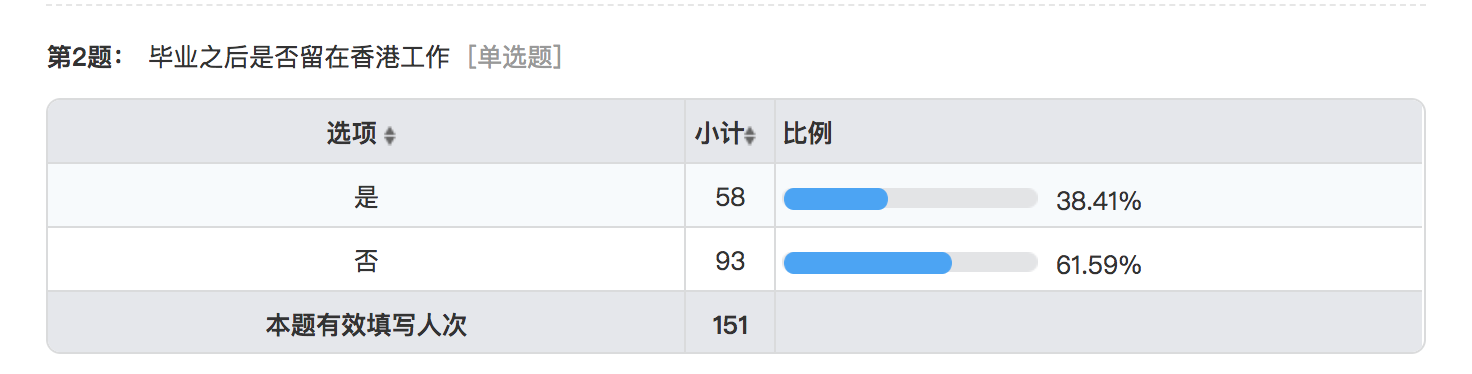

In [44]:
Image('留港與否.png')

The result shows that more than 60 percent of students surveyed will leave Hong Kong and return back to mainland after graduation

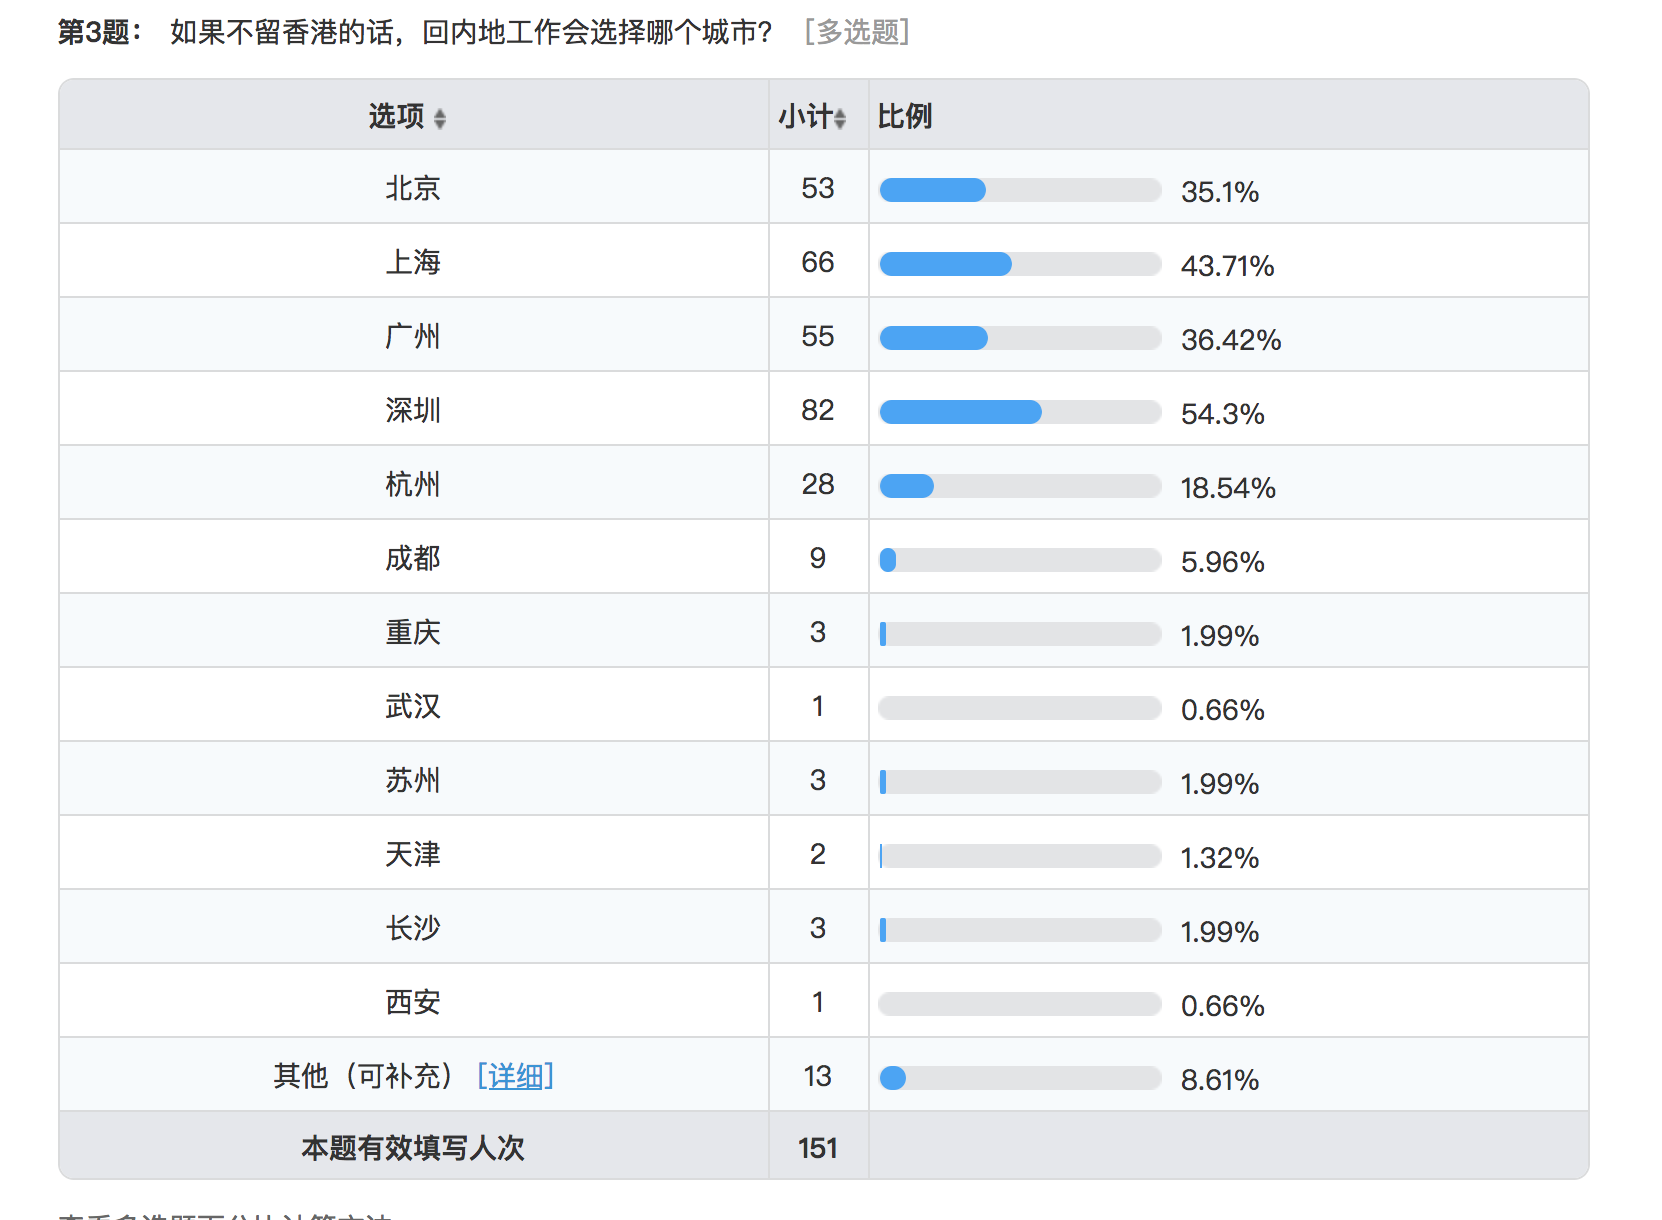

In [29]:
Image('問卷星_內地就業城市選擇.png')

China’s first-tier cities, Beijing, Shanghai, Guangzhou and Shenzhen, are still the most popular destinations for students. 54.3 percent of the students surveyed choose Shenzhen as the place where they would like to work most after graduation. Shanghai is the second favorite city of graduate students from School of Communication, with a share of 43.71 percent, followed by Guangzhou (36.42 percent). Beijing falls on the bottom of rankings among four first-tier cities, as 53 students surveyed choose it as the place to start their career, slightly 1.4 percent less than Shanghai. Hangzhou and Chengdu stands out among the remaining cities, each attracting 18.54 percent and 5.96 percent of graduate students.

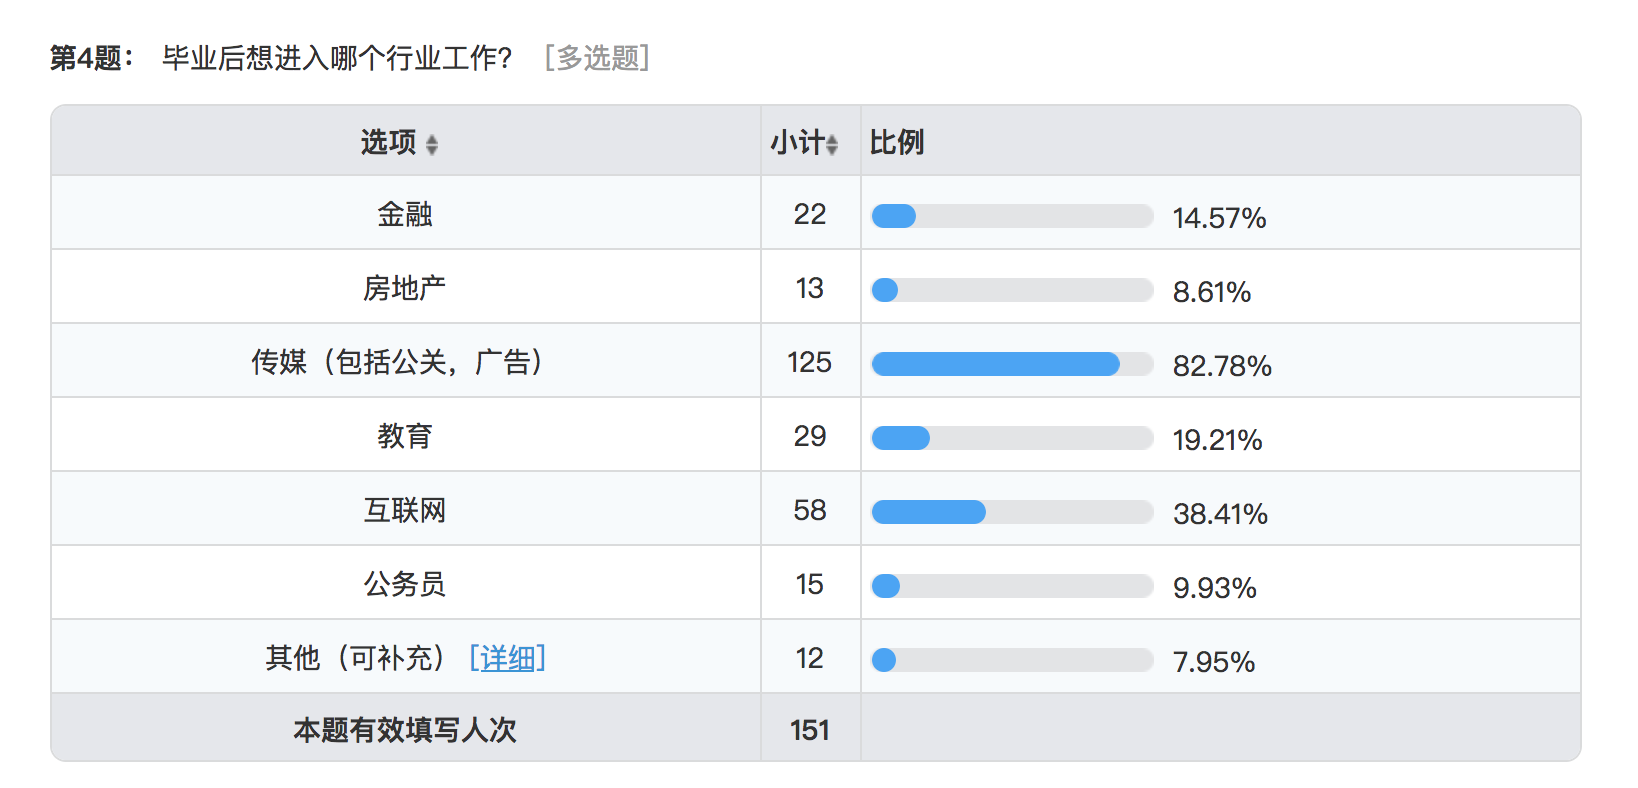

In [30]:
Image('問卷星_就業行業選擇.png')

Our survey also focused on graduate students’ career preference. It’s not surprising that more than four-fifths of students from School of Communication are willing to enter media industry after graduation, since all their majors and curriculum are closely related with it.

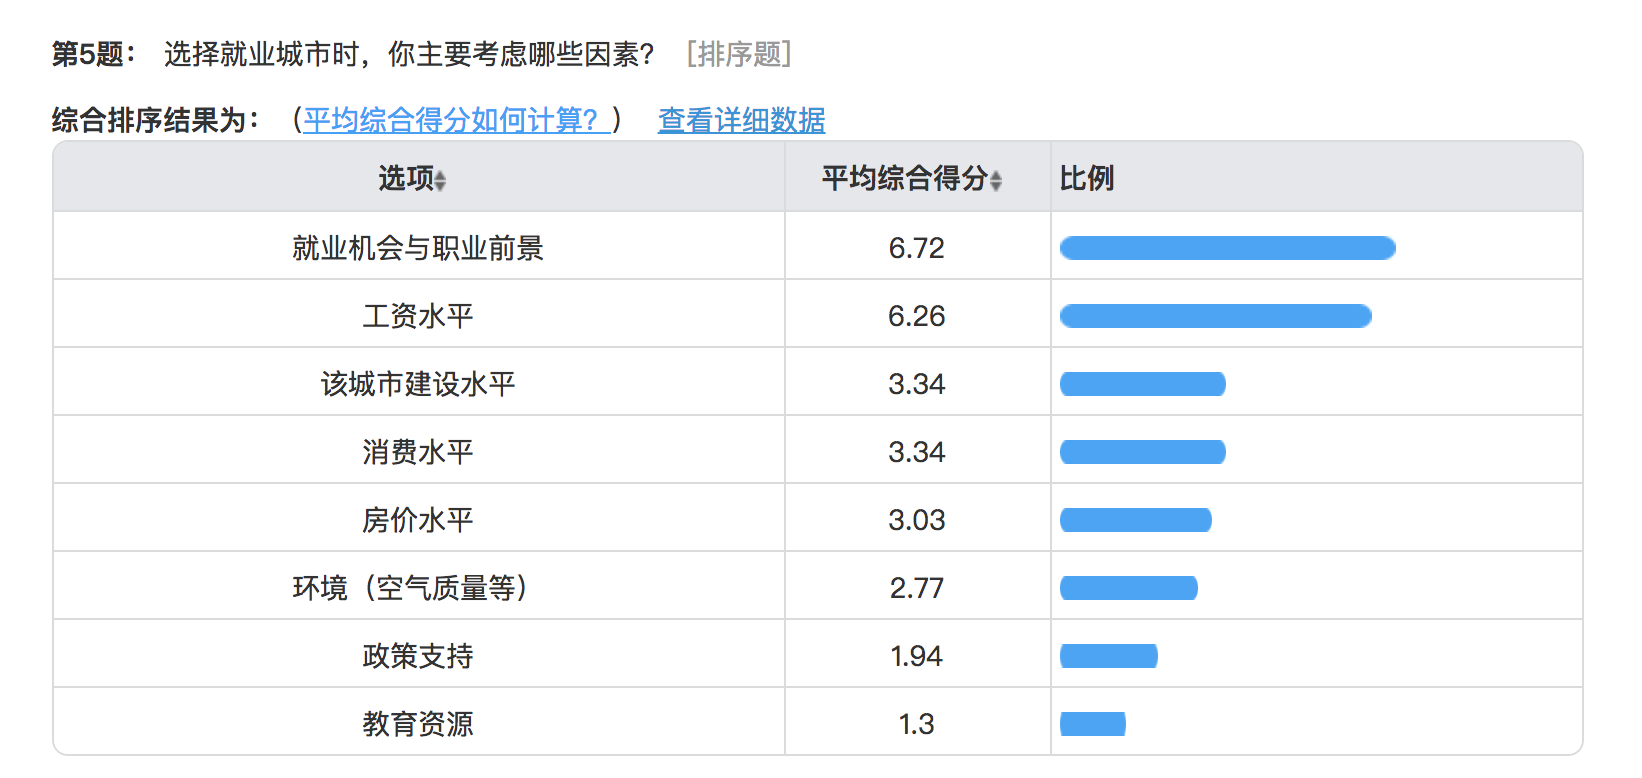

In [31]:
Image('問卷星_就業城市考慮因素.png')

When it comes to what affects their choices of city, there are two factors that students surveyed consider most: the employment opportunities and career prospects in a city; the industry’s average salary. These two factors decide directly that how much they can earn and whether they have more chance to get promoted after entering the workforce. In a word, all is about MONEY!

Since more than half of students surveyed plan to work in mainland China, particularly in big cities such as Beijing, Shanghai, Guangzhou, Shenzhen, Hangzhou and Chengdu, it would be great for them to have a better idea of the city they chose.

Part Two:The analysis of the top 6 cities

（1）Jobs & Salary

As we just mentioned in the first part, job prospect is the most important factor for newly graduates to choose their future destination. We want to further analyze the employment market for media industry in these six major cities in mainland China, so we choose the most popular job search website named 51job (https://search.51job.com/) as our data source. Media-related job skill, cities, full-time position, no previous experience are filter conditions when we were scraping the enormous information on the website. Then we found that there are over 15,000 data (around 2500 for each city) in total to support our analysis.

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
url="https://search.51job.com/list/020000,000000,0000,12%252C48%252C49%252C13,9,99,%2520-%25E5%25AE%259E%25E4%25B9%25A0,2,1.html?lang=c&stype=&postchannel=0000&workyear=01&cotype=99&degreefrom=99&jobterm=99&companysize=99&providesalary=99&lonlat=0%2C0&radius=-1&ord_field=0&confirmdate=9&fromType=&dibiaoid=0&address=&line=&specialarea=00&from=&welfare="
r = requests.get(url)
mypage=BeautifulSoup(r.text)
r.encoding = 'gbk'

/Users/marla/Desktop/marla322/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


we grab 3 types of information for every city: the position, the salary and the company. Here is the example of Shanghai, then we apply this part of code to ohter 5 cities.

In [ ]:
urls=[]
Total_position=[]
Total_company=[]
Total_salary=[]


for i in range (0,71):
    url='https://search.51job.com/list/020000,000000,0000,12%252C48%252C49%252C13,9,99,%2B-%25E5%25AE%259E%25E4%25B9%25A0,2,'+str(i+1)+'.html?lang=c&stype=1&postchannel=0000&workyear=01&cotype=99&degreefrom=99&jobterm=99&companysize=99&lonlat=0%2C0&radius=-1&ord_field=0&confirmdate=9&fromType=&dibiaoid=0&address=&line=&specialarea=00&from=&welfare='
    urls.append(url)
    
    for url in urls:
        r =requests.get(url)
        r.encoding = 'gbk'
        
        mypage=BeautifulSoup(r.text,'lxml')
    
    positions=mypage.find_all('p',attrs={'class':'t1'})
    position=positions[0]
    for position in positions:
        my_position=position.find('a').text.strip(' \t\n\r')
        Total_position.append(my_position)
    
    
    companies=mypage.find_all('span',attrs={'class':'t2'})
    company=companies[0]
    for company in companies:
        Total_company.append(company.text)
  
    salaries=mypage.find_all('span',attrs={'class':'t4'})
    salary=salaries[0]
    for salary in salaries:
        Total_salary.append(salary.text)
        
Total_company=Total_company[1:]
Total_salary=Total_salary[1:]

In [ ]:
# （since the units of measure of salary are different, we did some adjustment on that)
final_salary=[]
Total_salary
for the_salary in Total_salary:
    all_salary=the_salary#.split()
    #print(all_salary)
    
    if all_salary[-3:] == '千/月':
        salary=(all_salary[:-3])
        salary = float(salary.split('-')[0]) * 1000
        final_salary.append(salary)
        #break
    elif all_salary[-3:] == '万/月':
        salary=(all_salary[:-3])
        salary = float(salary.split('-')[0]) * 10000
        final_salary.append(salary)
    elif all_salary[-3:] == '万/年':
        salary=(all_salary[:-3])
        salary = float(salary.split('-')[0])/12*10000
        final_salary.append(salary)
    elif all_salary[-3:] == '元/天':
        salary=(all_salary[:-3])
        salary = float(salary.split('-')[0])*22
        final_salary.append(salary)
   
    else:
        salary = 0
        final_salary.append(salary)

In [4]:
with open("Shanghai.csv",'w',newline='') as f:
    spamwriter = csv.writer(f)
    spamwriter.writerows(Total_position)

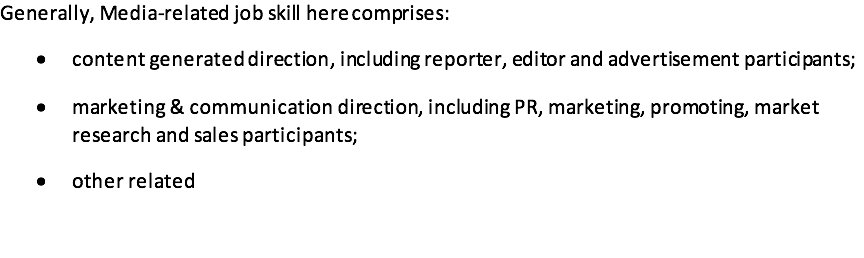

Take Shenzhen as example.we use these key words to search these jobs and count the total occupation number in each category and the average salary. Then apply this logic to other 5 cities

In [32]:
df=pd.read_csv('Shenzhen_51job_test.csv', encoding= 'gb18030')
df_content_generator=df['Total_position'].apply(lambda t:'记者' in str(t))|df['Total_position'].apply(lambda t:'文案' in str(t))|df['Total_position'].apply(lambda t:'编辑' in str(t))|df['Total_position'].apply(lambda t:'广告' in str(t))|df['Total_position'].apply(lambda t:'文化传播' in str(t))
content_position=df_content_generator.aggregate('sum')
contend_salary_mean=df[df_content_generator].mean()
df_marketing=df['Total_position'].apply(lambda t:'公关' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'销售' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))
marketing_position=df_marketing.aggregate('sum')
marketing_salary_mean=df[df_marketing].mean()
df_other=df['Total_position'].apply(lambda t:'行政' in str(t))|df['Total_position'].apply(lambda t:'文员' in str(t))
other_position=df_other.aggregate('sum')
other_salary_mean=df[df_other].mean()

df=pd.read_csv('Shanghai_51job.csv', encoding= 'gb18030')
df_content_generator=df['Total_position'].apply(lambda t:'记者' in str(t))|df['Total_position'].apply(lambda t:'文案' in str(t))|df['Total_position'].apply(lambda t:'编辑' in str(t))|df['Total_position'].apply(lambda t:'广告' in str(t))|df['Total_position'].apply(lambda t:'文化传播' in str(t))
shanghai_content_position=df_content_generator.aggregate('sum')
shanghai_contend_salary_mean=df[df_content_generator].mean()
df_marketing=df['Total_position'].apply(lambda t:'公关' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'销售' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'营销' in str(t))
shanghai_marketing_position=df_marketing.aggregate('sum')
shanghai_marketing_salary_mean=df[df_marketing].mean()
df_other=df['Total_position'].apply(lambda t:'行政' in str(t))|df['Total_position'].apply(lambda t:'文员' in str(t))
shanghai_other_position=df_other.aggregate('sum')
shanghai_other_salary_mean=df[df_other].mean()

df=pd.read_csv('Guangzhou_51job.csv', encoding= 'gb18030')
df_content_generator=df['Total_position'].apply(lambda t:'记者' in str(t))|df['Total_position'].apply(lambda t:'文案' in str(t))|df['Total_position'].apply(lambda t:'编辑' in str(t))|df['Total_position'].apply(lambda t:'广告' in str(t))|df['Total_position'].apply(lambda t:'文化传播' in str(t))
guangzhou_content_position=df_content_generator.aggregate('sum')
guangzhou_contend_salary_mean=df[df_content_generator].mean()
df_marketing=df['Total_position'].apply(lambda t:'公关' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'销售' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'营销' in str(t))
guangzhou_marketing_position=df_marketing.aggregate('sum')
guangzhou_marketing_salary_mean=df[df_marketing].mean()
df_other=df['Total_position'].apply(lambda t:'行政' in str(t))|df['Total_position'].apply(lambda t:'文员' in str(t))
guangzhou_other_position=df_other.aggregate('sum')
guangzhou_other_salary_mean=df[df_other].mean()

df=pd.read_csv('Hangzhou_51job.csv', encoding= 'gb18030')
df_content_generator=df['Total_position'].apply(lambda t:'记者' in str(t))|df['Total_position'].apply(lambda t:'文案' in str(t))|df['Total_position'].apply(lambda t:'编辑' in str(t))|df['Total_position'].apply(lambda t:'广告' in str(t))|df['Total_position'].apply(lambda t:'文化传播' in str(t))
Hangzhou_content_position=df_content_generator.aggregate('sum')
Hangzhou_contend_salary_mean=df[df_content_generator].mean()
df_marketing=df['Total_position'].apply(lambda t:'公关' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'销售' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'营销' in str(t))
Hangzhou_marketing_position=df_marketing.aggregate('sum')
Hangzhou_marketing_salary_mean=df[df_marketing].mean()
df_other=df['Total_position'].apply(lambda t:'行政' in str(t))|df['Total_position'].apply(lambda t:'文员' in str(t))
Hangzhou_other_position=df_other.aggregate('sum')
Hangzhou_other_salary_mean=df[df_other].mean()

df=pd.read_csv('Chengdu_51job.csv', encoding= 'gb18030')
df_content_generator=df['Total_position'].apply(lambda t:'记者' in str(t))|df['Total_position'].apply(lambda t:'文案' in str(t))|df['Total_position'].apply(lambda t:'编辑' in str(t))|df['Total_position'].apply(lambda t:'广告' in str(t))|df['Total_position'].apply(lambda t:'文化传播' in str(t))
chengdu_content_position=df_content_generator.aggregate('sum')
Chengdu_contend_salary_mean=df[df_content_generator].mean()
df_marketing=df['Total_position'].apply(lambda t:'公关' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'销售' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'营销' in str(t))
Chengdu_marketing_position=df_marketing.aggregate('sum')
Chengdu_marketing_salary_mean=df[df_marketing].mean()
df_other=df['Total_position'].apply(lambda t:'行政' in str(t))|df['Total_position'].apply(lambda t:'文员' in str(t))
Chengdu_other_position=df_other.aggregate('sum')
Chengdu_other_salary_mean=df[df_other].mean()

df=pd.read_csv('Beijing_51job.csv', encoding= 'gb18030')
df_content_generator=df['Total_position'].apply(lambda t:'记者' in str(t))|df['Total_position'].apply(lambda t:'文案' in str(t))|df['Total_position'].apply(lambda t:'编辑' in str(t))|df['Total_position'].apply(lambda t:'广告' in str(t))|df['Total_position'].apply(lambda t:'文化传播' in str(t))
Beijing_content_position=df_content_generator.aggregate('sum')
Beijing_contend_salary_mean=df[df_content_generator].mean()
df_marketing=df['Total_position'].apply(lambda t:'公关' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'销售' in str(t))|df['Total_position'].apply(lambda t:'策划' in str(t))|df['Total_position'].apply(lambda t:'推广' in str(t))|df['Total_position'].apply(lambda t:'市场研究' in str(t))|df['Total_position'].apply(lambda t:'营销' in str(t))
Beijing_marketing_position=df_marketing.aggregate('sum')
Beijing_marketing_salary_mean=df[df_marketing].mean()
df_other=df['Total_position'].apply(lambda t:'行政' in str(t))|df['Total_position'].apply(lambda t:'文员' in str(t))
Beijing_other_position=df_other.aggregate('sum')
Beijing_other_salary_mean=df[df_other].mean()


In [33]:
trace1 = go.Bar(
    y=['other related', 'marketing', 'content<br>generation'],
    x=[Beijing_other_position, Beijing_marketing_position, Beijing_content_position],
    name='Beijing',
    orientation = 'h',
    marker = dict(
        color = 'rgb(255, 255, 204)',
        line = dict(
            color = 'rgb(255, 255, 204)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=['other related', 'marketing', 'content<br>generation'],
    x=[shanghai_other_position, shanghai_marketing_position, shanghai_content_position],
    name='Shanghai',
    orientation = 'h',
    marker = dict(
        color = 'rgb(161, 218, 180)',
        line = dict(
            color = 'rgb(161, 218, 180)',
            width = 3)
    )
)
trace3 = go.Bar(
    y=['other related', 'marketing', 'content<br>generation'],
    x=[guangzhou_other_position, guangzhou_marketing_position, guangzhou_content_position],
    name='Guangzhou',
    orientation = 'h',
    marker = dict(
        color = 'rgb(65, 182, 196)',
        line = dict(
            color = 'rgb(65, 182, 196)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=['other related', 'marketing', 'content<br>generation'],
    x=[other_position, marketing_position, content_position],
    name='Shenzhen',
    orientation = 'h',
    marker = dict(
        color = 'rgb(44, 127, 184)',
        line = dict(
            color = 'rgb(44, 127, 184)',
            width = 3)
    )
)
trace5 = go.Bar(
    y=['other related', 'marketing', 'content<br>generation'],
    x=[Hangzhou_other_position, Hangzhou_marketing_position, Hangzhou_content_position],
    name='Hangzhou',
    orientation = 'h',
    marker = dict(
        color = 'rgb(8, 104, 172)',
        line = dict(
            color = 'rgb(8, 104, 172)',
            width = 3)
    )
)
trace6 = go.Bar(
    y=['other related', 'marketing', 'content<br>generation'],
    x=[Chengdu_other_position, Chengdu_marketing_position, chengdu_content_position],
    name='Chengdu',
    orientation = 'h',
    marker = dict(
        color = 'rgb(37, 52, 148)',
        line = dict(
            color = 'rgb(37, 52, 148)',
            width = 3)
    )
)



data = [trace1, trace2,trace3,trace4,trace5,trace6]
layout = {
  "barmode": "stack", 
  "title": "Communication&Media Related Jobs", 
  "xaxis": {
    "autorange": True, 
    "range": [0, 4573.68421053], 
    "title": "Click to enter X axis title", 
    "type": "linear"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [-0.5, 2.5], 
    "type": "category"
  }
}

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

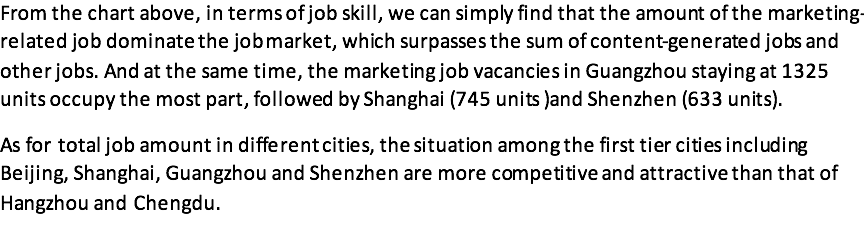

In order to have a better idea of what kind of media-related job is mostly needed in six cities, we subdivide these three categories(content-generated, marketing, other related) into eleven sub-categories based on keywords by scraping information from the data we have:


In [35]:
df=pd.read_csv('Guangzhou_51job.csv', encoding= 'gb18030')
df_df=df['Total_position'].apply(lambda t:'实习' not in str(t))
df_g=df[df_df]
df_g_repo=df_g['Total_position'].apply(lambda t:'记者' in str(t)).aggregate('sum')
df_g_edi=df_g['Total_position'].apply(lambda t:'编辑' in str(t)).aggregate('sum')
df_g_ch=df_g['Total_position'].apply(lambda t:'策划' in str(t)).aggregate('sum')
df_g_sj=df_g['Total_position'].apply(lambda t:'设计' in str(t)).aggregate('sum')
df_g_ad=df_g['Total_position'].apply(lambda t:'广告' in str(t)).aggregate('sum')
df_g_pr=df_g['Total_position'].apply(lambda t:'公关' in str(t)).aggregate('sum')
df_g_yx=df_g['Total_position'].apply(lambda t:'营销' in str(t)).aggregate('sum')
df_g_tg=df_g['Total_position'].apply(lambda t:'推广' in str(t)).aggregate('sum')
df_g_zx=df_g['Total_position'].apply(lambda t:'咨询' in str(t)).aggregate('sum')

df=pd.read_csv('Shenzhen_51job_test.csv', encoding= 'gb18030')
df_df=df['Total_position'].apply(lambda t:'实习' not in str(t))
df_s=df[df_df]
df_s_repo=df_s['Total_position'].apply(lambda t:'记者' in str(t)).aggregate('sum')
df_s_edi=df_s['Total_position'].apply(lambda t:'编辑' in str(t)).aggregate('sum')
df_s_ch=df_s['Total_position'].apply(lambda t:'策划' in str(t)).aggregate('sum')
df_s_sj=df_s['Total_position'].apply(lambda t:'设计' in str(t)).aggregate('sum')
df_s_ad=df_s['Total_position'].apply(lambda t:'广告' in str(t)).aggregate('sum')
df_s_pr=df_s['Total_position'].apply(lambda t:'公关' in str(t)).aggregate('sum')
df_s_yx=df_s['Total_position'].apply(lambda t:'营销' in str(t)).aggregate('sum')
df_s_tg=df_s['Total_position'].apply(lambda t:'推广' in str(t)).aggregate('sum')
df_s_zx=df_s['Total_position'].apply(lambda t:'咨询' in str(t)).aggregate('sum')

df=pd.read_csv('Hangzhou_51job.csv', encoding= 'gb18030')
df_df=df['Total_position'].apply(lambda t:'实习' not in str(t))
df_H=df[df_df]
df_H_reporter=df_H['Total_position'].apply(lambda t:'记者' in str(t)).aggregate('sum')
df_H_edi=df_H['Total_position'].apply(lambda t:'编辑' in str(t)).aggregate('sum')
df_H_pn=df_H['Total_position'].apply(lambda t:'策划' in str(t)).aggregate('sum')
df_H_ds=df_H['Total_position'].apply(lambda t:'设计' in str(t)).aggregate('sum')
df_H_ad=df_H['Total_position'].apply(lambda t:'广告' in str(t)).aggregate('sum')
df_H_pr=df_H['Total_position'].apply(lambda t:'公关' in str(t)).aggregate('sum')
df_H_mk=df_H['Total_position'].apply(lambda t:'推广' in str(t)).aggregate('sum')
df_H_yx=df_H['Total_position'].apply(lambda t:'营销' in str(t)).aggregate('sum')
df_H_zx=df_H['Total_position'].apply(lambda t:'咨询' in str(t)).aggregate('sum')

df=pd.read_csv('Chengdu_51job.csv', encoding= 'gb18030')
df_df=df['Total_position'].apply(lambda t:'实习' not in str(t))
df_C=df[df_df]
df_C_reporter=df_C['Total_position'].apply(lambda t:'记者' in str(t)).aggregate('sum')
df_C_edi=df_C['Total_position'].apply(lambda t:'编辑' in str(t)).aggregate('sum')
df_C_pn=df_C['Total_position'].apply(lambda t:'策划' in str(t)).aggregate('sum')
df_C_ds=df_C['Total_position'].apply(lambda t:'设计' in str(t)).aggregate('sum')
df_C_ad=df_C['Total_position'].apply(lambda t:'广告' in str(t)).aggregate('sum')
df_C_pr=df_C['Total_position'].apply(lambda t:'公关' in str(t)).aggregate('sum')
df_C_mk=df_C['Total_position'].apply(lambda t:'推广' in str(t)).aggregate('sum')
df_C_yx=df_C['Total_position'].apply(lambda t:'营销' in str(t)).aggregate('sum')
df_C_zx=df_C['Total_position'].apply(lambda t:'咨询' in str(t)).aggregate('sum')

df=pd.read_csv('Beijing_51job.csv', encoding= 'gb18030')
df_df=df['Total_position'].apply(lambda t:'实习' not in str(t))
df_B=df[df_df]
df_B_reporter=df_B['Total_position'].apply(lambda t:'记者' in str(t)).aggregate('sum')
df_B_edi=df_B['Total_position'].apply(lambda t:'编辑' in str(t)).aggregate('sum')
df_B_pn=df_B['Total_position'].apply(lambda t:'策划' in str(t)).aggregate('sum')
df_B_ds=df_B['Total_position'].apply(lambda t:'设计' in str(t)).aggregate('sum')
df_B_ad=df_B['Total_position'].apply(lambda t:'广告' in str(t)).aggregate('sum')
df_B_pr=df_B['Total_position'].apply(lambda t:'公关' in str(t)).aggregate('sum')
df_B_mk=df_B['Total_position'].apply(lambda t:'推广' in str(t)).aggregate('sum')
df_B_yx=df_B['Total_position'].apply(lambda t:'营销' in str(t)).aggregate('sum')
df_B_zx=df_B['Total_position'].apply(lambda t:'咨询' in str(t)).aggregate('sum')

df=pd.read_csv('Shanghai_51job.csv', encoding= 'gb18030')
df_df=df['Total_position'].apply(lambda t:'实习' not in str(t))
df_SH=df[df_df]
df_SH_reporter=df_SH['Total_position'].apply(lambda t:'记者' in str(t)).aggregate('sum')
df_SH_edi=df_SH['Total_position'].apply(lambda t:'编辑' in str(t)).aggregate('sum')
df_SH_pn=df_SH['Total_position'].apply(lambda t:'策划' in str(t)).aggregate('sum')
df_SH_ds=df_SH['Total_position'].apply(lambda t:'设计' in str(t)).aggregate('sum')
df_SH_ad=df_SH['Total_position'].apply(lambda t:'广告' in str(t)).aggregate('sum')
df_SH_pr=df_SH['Total_position'].apply(lambda t:'公关' in str(t)).aggregate('sum')
df_SH_mk=df_SH['Total_position'].apply(lambda t:'推广' in str(t)).aggregate('sum')
df_SH_yx=df_SH['Total_position'].apply(lambda t:'营销' in str(t)).aggregate('sum')
df_SH_zx=df_SH['Total_position'].apply(lambda t:'咨询' in str(t)).aggregate('sum')

In [36]:
trace = go.Heatmap(z=[[df_B_reporter, df_B_edi, df_B_pn, df_B_ds, df_B_ad,df_B_pr,df_B_mk,df_B_yx,df_B_zx], 
                      [df_SH_reporter, df_SH_edi, df_SH_pn, df_SH_ds, df_SH_ad,df_SH_pr,df_SH_mk,df_SH_yx,df_SH_zx],
                      [df_g_repo,df_g_edi,df_g_ch,df_g_sj,df_g_ad,df_g_pr,df_g_yx,df_g_tg,df_g_zx],
                      [df_s_repo,df_s_edi,df_s_ch,df_s_sj,df_s_ad,df_s_pr,df_s_yx,df_s_tg,df_s_zx],
                      [df_H_reporter,df_H_edi,df_H_pn,df_H_ds,df_H_ad,df_H_pr,df_H_mk,df_H_yx,df_H_zx],
                      [df_C_reporter,df_C_edi,df_C_pn,df_C_ds,df_C_ad,df_C_pr,df_C_mk,df_C_yx,df_C_zx]],
                   x=['repoter','editor','copywriter','design','ad','pr','promotion','sales','consultant'],
                   y=['Beijing', 'Shanghai','Guangzhou','Shenzhen','Hangzhou','Chengdu'])

data=[trace]
iplot(data, filename='labelled-heatmap')

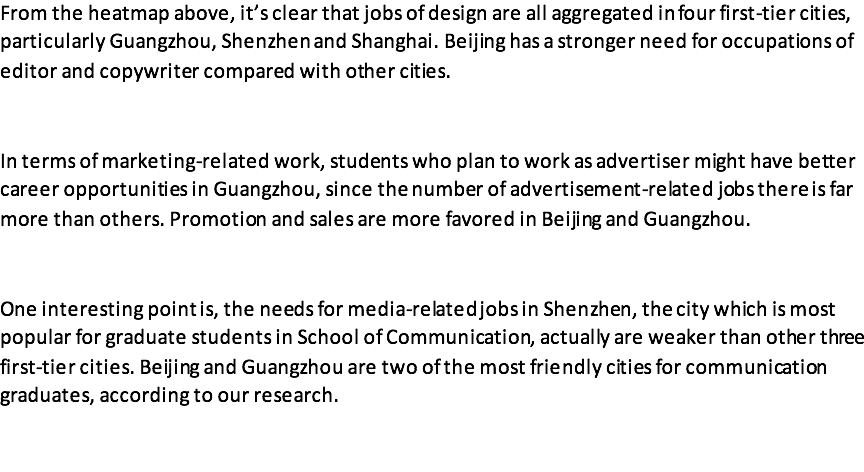

Salary level is another significant part of a city’s attraction for overseas graduates.So another part of our project is the average salary comparison among six top tier cities. 

In [38]:
trace1 = {
  "x": ["content generation", "marketing", "other related"], 
  "y": [float(Beijing_contend_salary_mean),float(Beijing_marketing_salary_mean),float(Beijing_other_salary_mean)], 
  "marker": {"color": "rgb(255, 255, 204)"}, 
  "name": "Beijing", 
  "type": "bar", 
  "uid": "fe7f98", 
  "xsrc": "XinyuM:3:cee1e4", 
  "ysrc": "XinyuM:3:58dd98"
}
trace2 = {
  "x": ["content generation", "marketing", "other related"], 
  "y": [float(shanghai_contend_salary_mean),float(shanghai_marketing_salary_mean),float(shanghai_other_salary_mean)], 
  "marker": {"color": "rgb(161, 218, 180)"}, 
  "name": "shanghai", 
  "type": "bar", 
  "uid": "a03931", 
  "xsrc": "XinyuM:3:cee1e4", 
  "ysrc": "XinyuM:3:23f69a"
}
trace3 = {
  "x": ["content generation", "marketing", "other related"], 
  "y": [float(guangzhou_contend_salary_mean),float(guangzhou_marketing_salary_mean),float(guangzhou_other_salary_mean)], 
  "marker": {"color": "rgb(65, 182, 196)"}, 
  "name": "Guangzhou", 
  "type": "bar", 
  "uid": "2ff10b", 
  "xsrc": "XinyuM:3:cee1e4", 
  "ysrc": "XinyuM:3:fc6adf"
}
trace4 = {
  "x": ["content generation", "marketing", "other related"], 
  "y": [float(contend_salary_mean), float(marketing_salary_mean),float(other_salary_mean)], 
  "marker": {"color": "rgb(44, 127, 184)"}, 
  "name": "shenzhen", 
  "type": "bar", 
  "uid": "f25fae", 
  "xsrc": "XinyuM:3:cee1e4", 
  "ysrc": "XinyuM:3:ee8231"
}
trace5 = {
  "x": ["content generation", "marketing", "other related"], 
  "y": [float(Hangzhou_contend_salary_mean),float(Hangzhou_marketing_salary_mean),float(Hangzhou_other_salary_mean)], 
  "marker": {"color": "rgb(8, 104, 172)"}, 
  "name": "Hangzhou", 
  "type": "bar", 
  "uid": "e55ccc", 
  "xsrc": "XinyuM:3:cee1e4", 
  "ysrc": "XinyuM:3:6a7458"
}
trace6 = {
  "x": ["content generation", "marketing", "other related"], 
  "y": [float(Chengdu_contend_salary_mean),float(Chengdu_marketing_salary_mean),float(Chengdu_other_salary_mean)], 
  "marker": {"color": "rgb(37, 52, 148)"}, 
  "name": "Chengdu", 
  "type": "bar", 
  "uid": "27f905", 
  "xsrc": "XinyuM:3:cee1e4", 
  "ysrc": "XinyuM:3:3b7d85"
}
data =[trace1, trace2, trace3, trace4, trace5, trace6]
layout = {
  "annotations": [
    {
      "x": 0.0762331838565, 
      "y": 5439.80314391, 
      "arrowsize": 1, 
      "ax": 0, 
      "ay": -32, 
      "font": {
        "color": "rgb(128, 0, 128)", 
        "size": 15
      }, 
      "showarrow": True, 
      "text": "<b>Shenzhen:5388.49RMB</b>", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 0.80269058296, 
      "y": 5876.40339625, 
      "ax": 0, 
      "ay": -52, 
      "font": {
        "color": "rgb(128, 0, 128)", 
        "size": 15
      }, 
      "showarrow": True, 
      "text": "<b>Shanghai:5832.25RMB</b>", 
      "xref": "x", 
      "yref": "y"
    }, 
    {
      "x": 2.07623318386, 
      "y": 5677.79731725, 
      "ax": 0, 
      "ay": -42, 
      "font": {
        "color": "rgb(128, 0, 128)", 
        "size": 15
      }, 
      "showarrow": True, 
      "text": "<b>Shenzhen:5647.52RMB</b>", 
      "xref": "x", 
      "yref": "y"
    }
  ], 
  "barmode": "group", 
  "title": "Average Salary in 6 Cities", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 2.5], 
    "tickangle": -25, 
    "title": "Position", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 7383.47305453], 
    "title": "Salary", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='angled-text-bar')

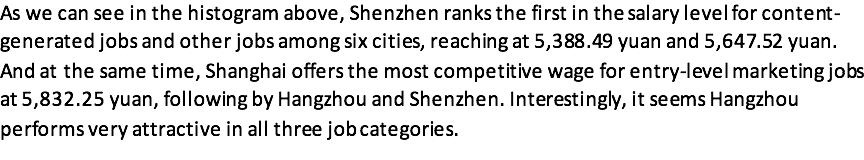

(2)Housing Price:

Imagine when you step into a new city, which is far from your family and friends, how can you gain spiritual fulfillment? The answer is finding your own house, no matter is buying or renting. Based on this idea, we try to discuss the housing price in top tier cities and our source is a real estate agent website called An Juke (https://hangzhou.anjuke.com/) covering most part of China.

In [39]:
df = pd.read_excel('6城市近5年商品房销售平均价格.xlsx')

In [40]:
trace1 = go.Scatter(
    x=df.index,
    y=df['北京'].values,
    name = 'Beijing',
    marker=dict(
        color='rgb(255, 255, 204)',
    )
)
trace2 = go.Scatter(
    x=df.index,
    y=df['上海'].values,
    name = 'Shanghai',
    marker=dict(
        color='rgb(161, 218, 180)',
    )
)
trace3 = go.Scatter(
    x=df.index,
    y=df['广州'].values,
    name = 'Guangzhou',
    marker=dict(
        color='rgb(65, 182, 196)',
    )
)
trace4 = go.Scatter(
    x=df.index,
    y=df['深圳'].values,
    name = 'Shenzhen',
    marker=dict(
        color='rgb(44, 127, 184)',
    )
)
trace5 = go.Scatter(
    x=df.index,
    y=df['杭州'].values,
    name = 'Hangzhou',
    marker=dict(
        color='rgb(8, 104, 172)',
    )
)
trace6 = go.Scatter(
    x=df.index,
    y=df['成都'].values,
    name = 'Chengdu',
    marker=dict(
        color='rgb(37, 52, 148)',
    )
)

data = [trace1, trace2,trace3,trace4,trace5,trace6]
iplot({"data":data, 
       "layout": Layout(title="Average Commercial Housing Price from 2012-2016")
      })

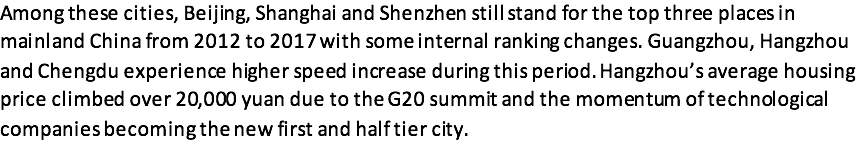

However, how to quantify the comparison between housing price and income level is very hard in reality. One effective way to measure this is housing price-to-income ratio. Here, we introduce a formula which fit in our scenario most.
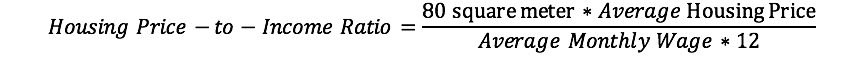

We use 80 square meters to represent the house place because this size is suit for single youngsters generally. 

In [41]:
Beijing_per_year=(Beijing_contend_salary_mean+Beijing_marketing_salary_mean+Beijing_other_salary_mean)/3*12
Beijing_rate=54559*80/Beijing_per_year
Shanghai_per_year=(shanghai_contend_salary_mean+shanghai_marketing_salary_mean+shanghai_contend_salary_mean)/3*12
Shanghai_rate=50527*80/Shanghai_per_year
Guangzhou_per_year=(guangzhou_contend_salary_mean+guangzhou_marketing_salary_mean+guangzhou_other_salary_mean)/3*12
Guangzhou_rate=28586*80/Guangzhou_per_year
Shenzhen_per_year=(contend_salary_mean+marketing_salary_mean+other_salary_mean)/3*12
Shenzhen_rate=48997*80/Shenzhen_per_year
Hangzhou_per_year=(Hangzhou_contend_salary_mean+Hangzhou_marketing_salary_mean+Hangzhou_other_salary_mean)/3*12
Hangzhou_rate=20930*80/Hangzhou_per_year
Chengdu_per_year=(Chengdu_contend_salary_mean+Chengdu_marketing_salary_mean+Chengdu_other_salary_mean)/3*12
Chengdu_rate=13023*80/Chengdu_per_year

In [42]:
from plotly import tools

import numpy as np

y_saving = [float(Chengdu_rate),float(Hangzhou_rate),float(Guangzhou_rate),float(Shenzhen_rate),
            float(Shanghai_rate), float(Beijing_rate)]
y_net_worth = [13023, 20930,28586,48997,50527, 54559]
x_saving = ['Chengdu', 'Hangzhou', 'Guangzhou', 'Shengzhen',
            'Shanghai', 'Beijing']
x_net_worth = ['Chengdu', 'Hangzhou','Guangzhou','Shengzhen',
            'Shanghai', 'Beijing']
trace0 = go.Bar(
    x=y_saving,
    y=x_saving,
    marker=dict(
        color='rgb(37, 52, 148)',
        line=dict(
            color='rgb(37, 52, 148)',
            width=1),
    ),
    name='HousingPrice-to-Income Ratio',
    orientation='h',
)
trace1 = go.Scatter(
    x=y_net_worth,
    y=x_net_worth,
    mode='lines+markers',
    line=dict(
        color='rgb(128, 0, 128)'),
    name='Average commercial housing price on Apri 2018',
)
layout = dict(
    title='HousingPrice-to-Income Ratio & Average Housing Price',
    yaxis1=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis1=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=25000,
    ),
    legend=dict(
        x=0.029,
        y=1.038,
        font=dict(
            size=10,
        ),
    ),
    margin=dict(
        l=100,
        r=20,
        t=70,
        b=70,
    ),
    paper_bgcolor='rgb(253, 253, 253)',
    plot_bgcolor='rgba(252, 252, 252, 0.06)',
)

annotations = []

y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)


for ydn, yd, xd in zip(y_nw, y_s, x_saving):
  
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn - 20000,
                            text='{:,}'.format(ydn) + 'RMB',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 5,
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(37, 52, 148)'),
                            showarrow=False))

layout['annotations'] = annotations


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig, filename='oecd-networth-saving-bar-line')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



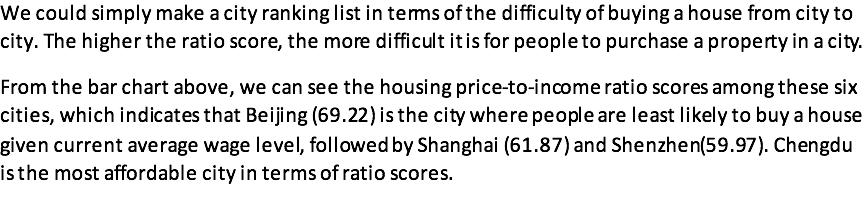

(3)Talent Attaction Policy

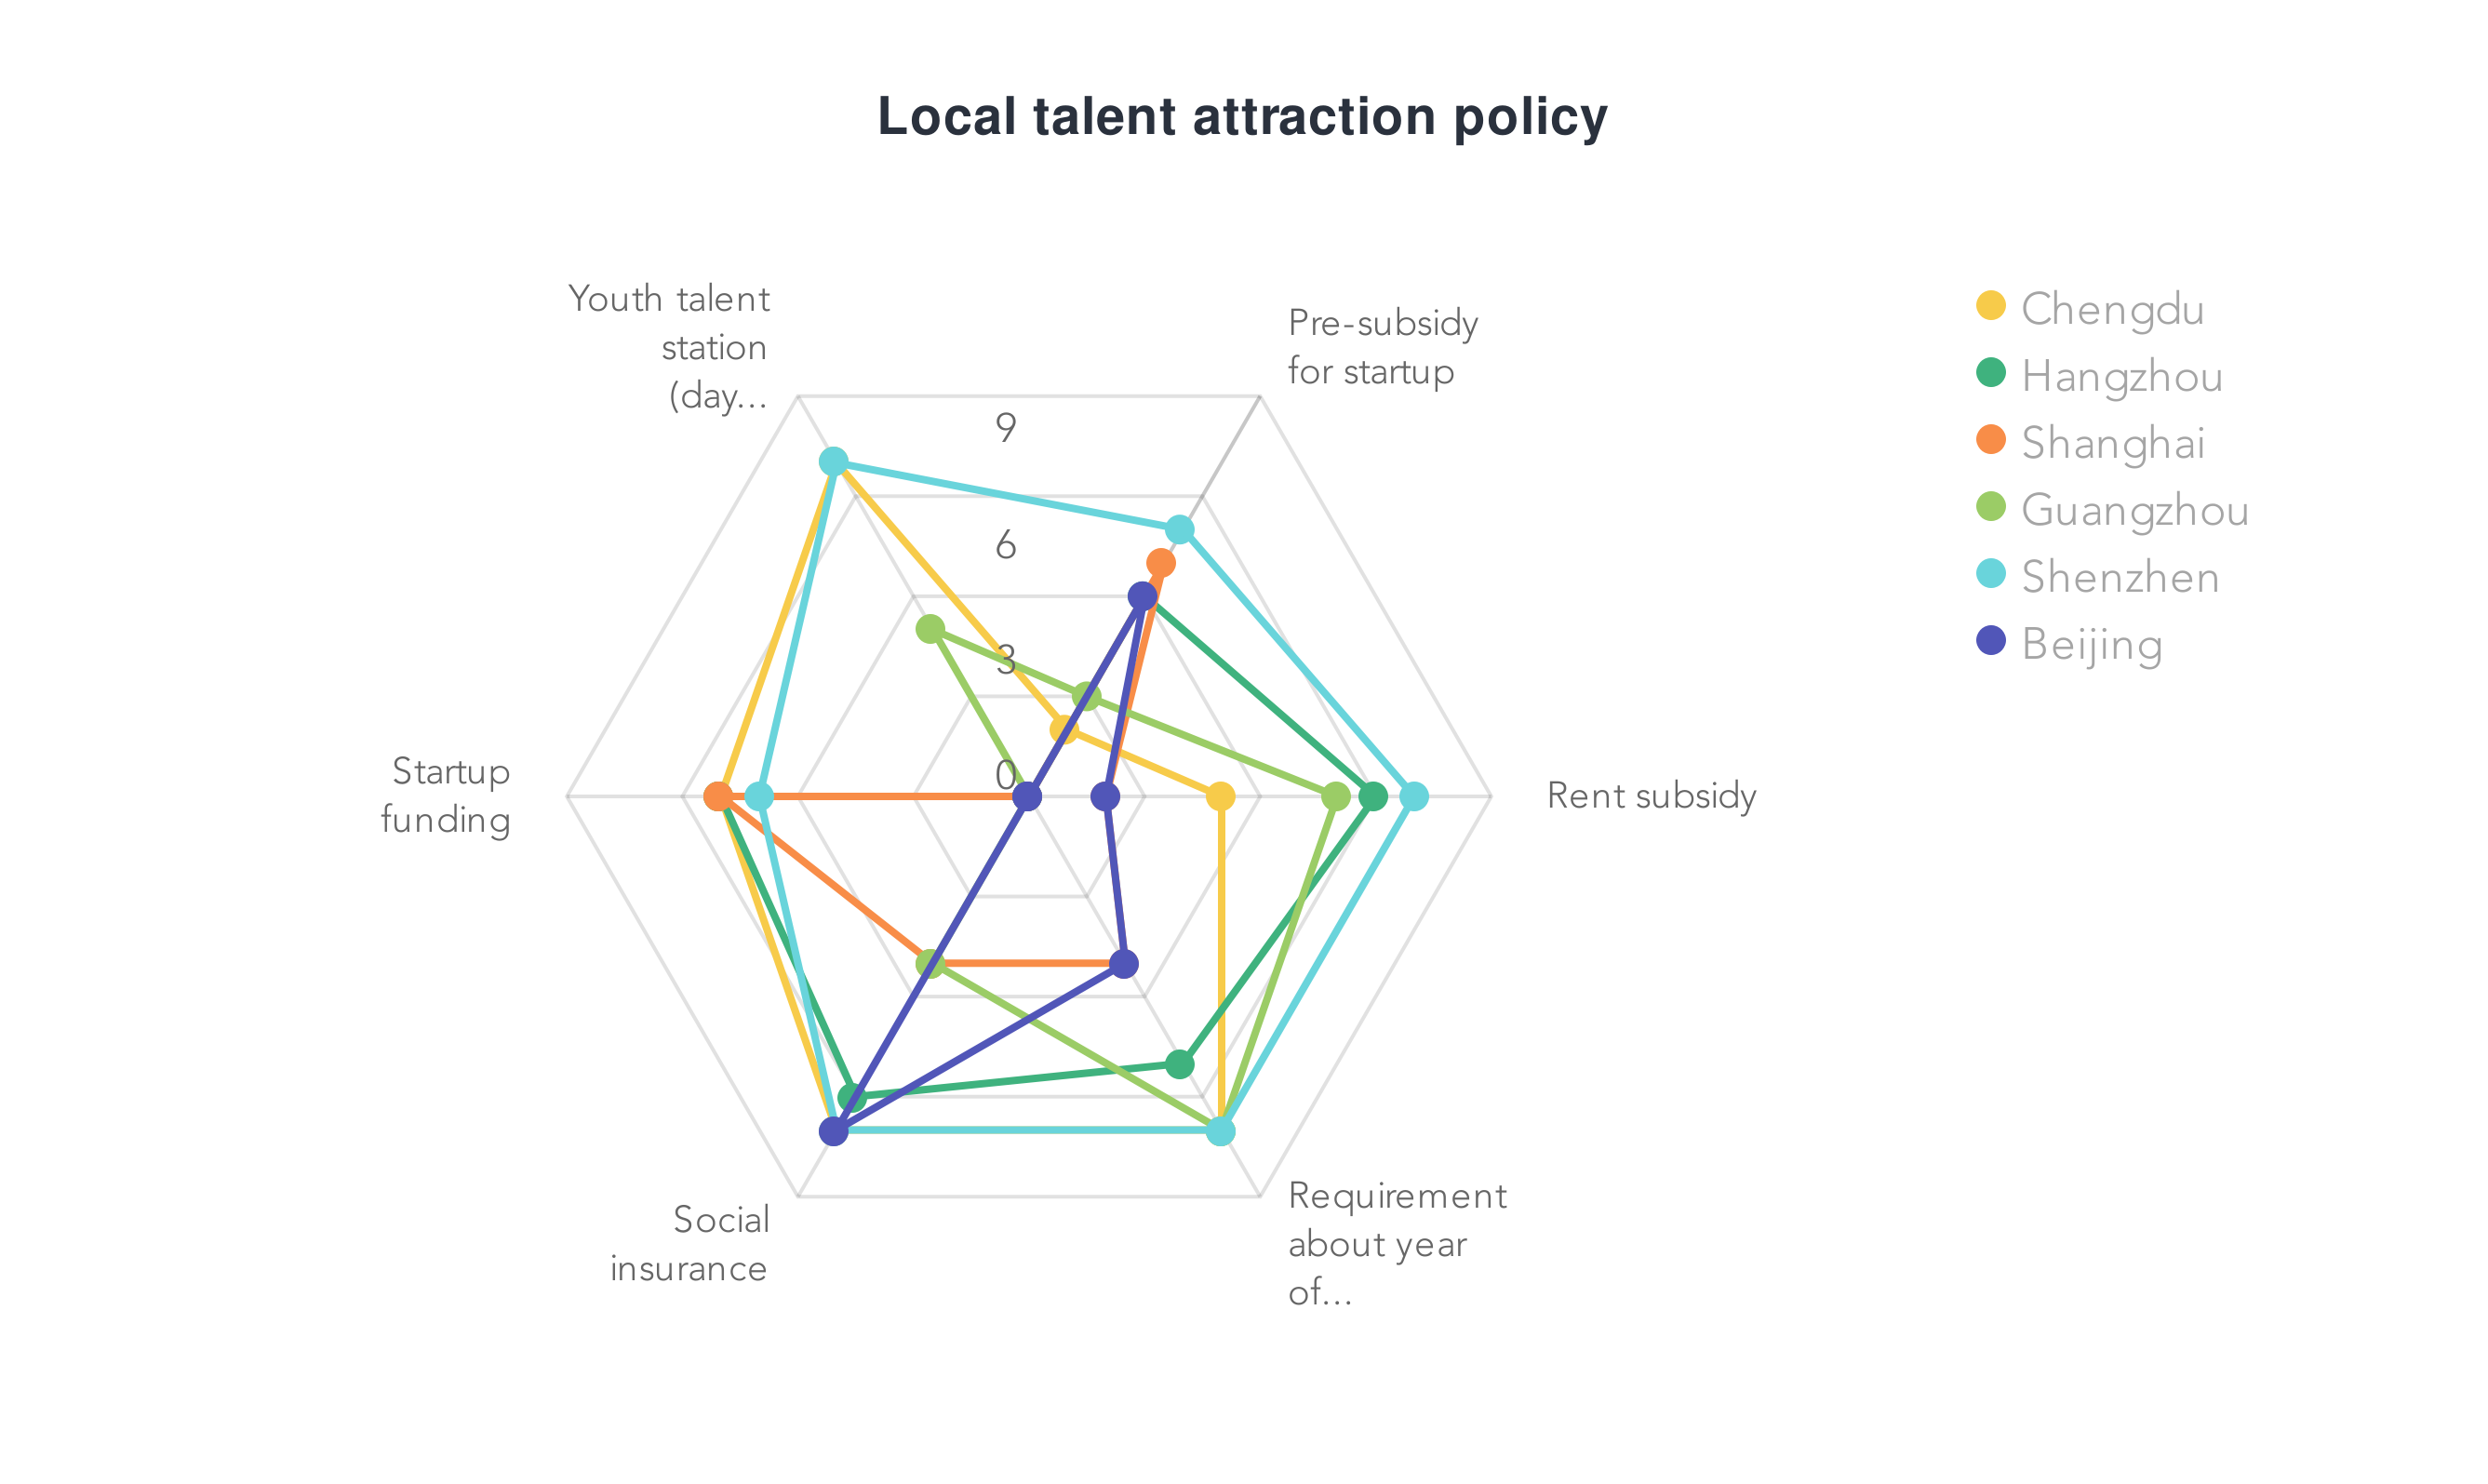

In [43]:
Image('Talent Attraction Policies.png')

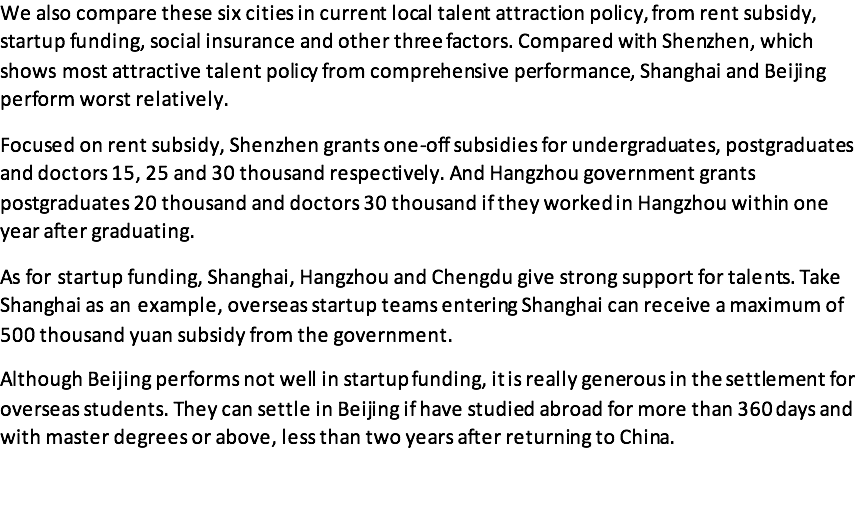

Part Three:Conclusion

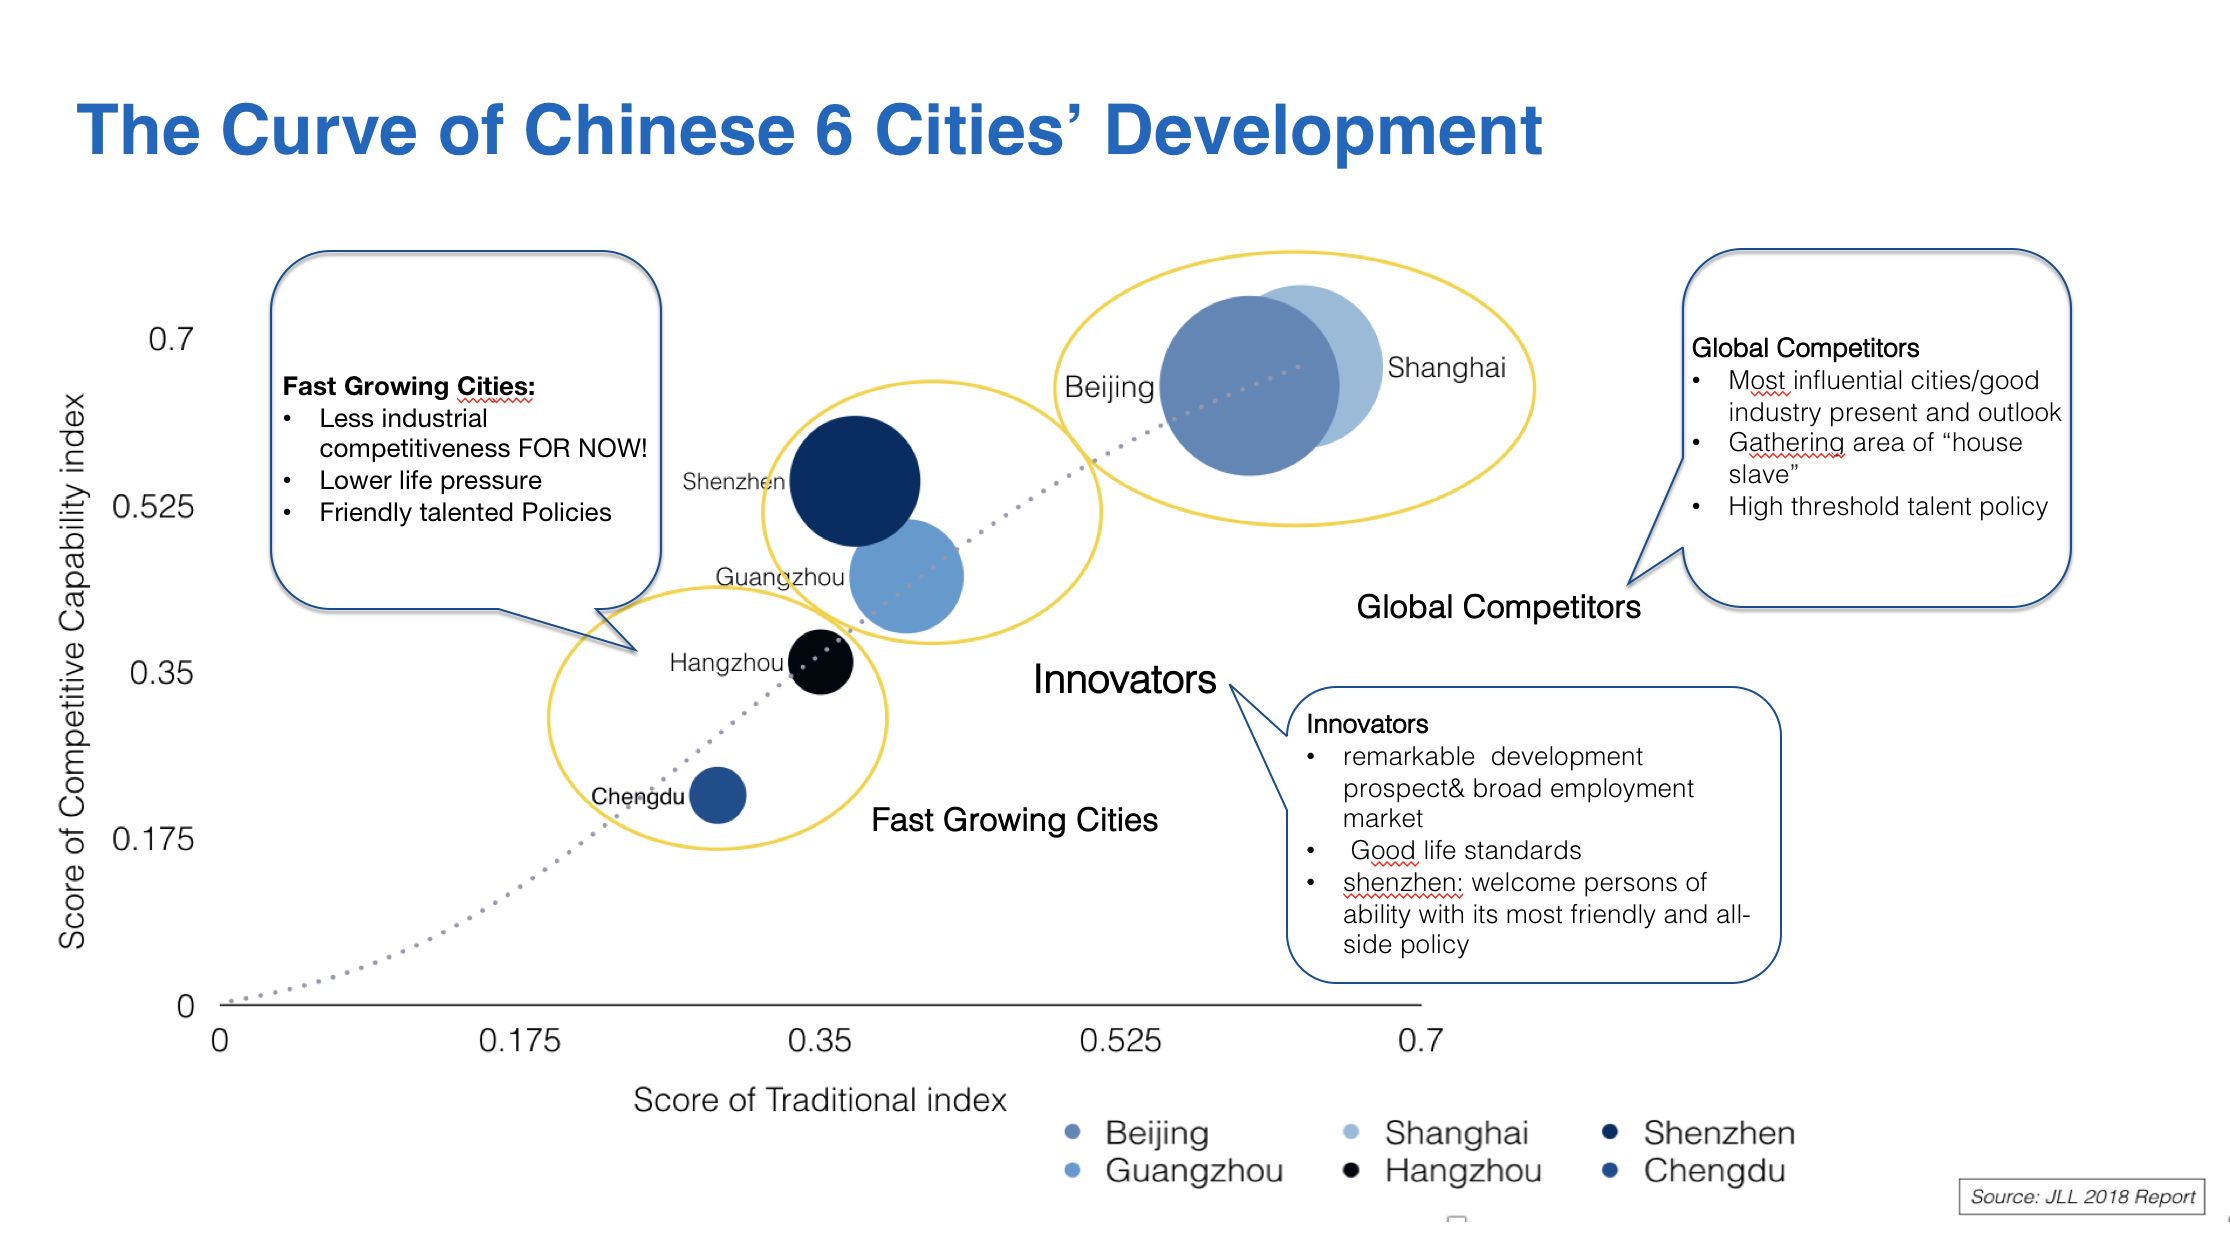

In [46]:
Image('仲量联行.png')

On Apri 2018, JLL evaluated 12 cities in mainland from 2 dimension, the traditional development driven factors and competitive factors.

Beijing and Shanghai, ranking high on both dimension, are grouped as “ Global Competitors”. From our analysis we can also see that these two are enjoying an good industry present and outlook, which is attractive for all job seekers. But on the other hand, high housing price makes these two cities become gathering areas of “ housing slaves”, besides, the talent policies are with high threshold.

As for Guangzhou and Shenzhen, they are grouped as “Innovators”, which means they have a remarkable development prospect and broad employment market as well. They really pay attention to develop emerging industry including IT and be willing to support startup companies, for which talent is crucial. So from our analysis we can see, Shenzhen welcomes persons of ability by the best talent attraction policy within 6 cities that has covered  housing, household registration and startup fundings. 

Hangzhou and Chengdu are fast growing cities. As for the number of media occupations and comprehensive industry resources, these two cities do not perform as well as other four cities. However, residents here have lower life pressure especially the house purchase pressure. Furthermore, governments released plenty of talent policies to attract high education talents entering, like granting rent subsidy, resolving settle, etc.